In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [11]:
D = 2
K = 3
N = int(K *1e3)

X0 = np.random.randn((N//K),D) +np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,2])
X2 = np.random.randn((N//K),D) + np.array ([-2,2])
X = np.vstack((X0,X1,X2))

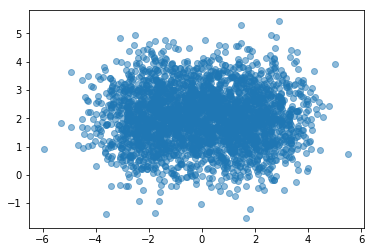

In [12]:
plt.figure()
plt.scatter(X[:,0],X[:,1],alpha=.5)

In [13]:
X

array([[ 1.39075681,  2.2836029 ],
       [ 1.76968346,  0.63389184],
       [ 2.62560449,  4.03444547],
       ...,
       [-2.38245602,  2.27814122],
       [-2.03823716,  1.4157292 ],
       [-1.62021024,  2.67880911]])

In [19]:
#Testing shit

B = 1
k= 3
mk = 2*np.random.randn(3,D)
mj = np.sum(mk)
#x NxD
#M KxD
#R NxK
xi = X[np.random.choice(X.shape[0], k, replace=False), :]
mk = 2*np.random.randn(3,D)
for i in mk:
    print(i)
print(mj)

[ 0.52702782 -1.11639007]
[-0.47804863 -0.18825283]
[-1.1733054 -0.3398405]
9.302770932567347


In [20]:
np.exp(-1*(np.dot((ii-j),(ii-j).T))**2)

NameError: name 'ii' is not defined

In [21]:
xi

array([[ 0.46043798,  3.87993279],
       [ 0.02941997,  2.88499601],
       [-0.30580329,  2.68023887]])

In [22]:
B = 1
k= 3
mk = 2*np.random.randn(3,D)
mj = np.sum(mk,axis =0)
#x NxD
#M KxD
#R NxK
xi = X[np.random.choice(X.shape[0], k, replace=False), :]
for ii in xi:
    for mkk in mk:
        r = (np.exp(-B*(np.dot((ii-mkk),(ii-mkk))**2)))/((np.exp(-B*np.dot((ii-j).T,(ii-j))**2)))
        print(r)
   # mk = (r*ii)/r
    #    J = r*((ii-mkk).dot(ii-mkk))**2
     #   plt.plot(J)
xi

NameError: name 'j' is not defined

In [4]:
#x NxD
#M KxD
#R NxK
class K_means:
    
    def __init__(self,X,K,beta):
        self.X=X
        self.K=K
        self.beta = beta
        self.N, self.D = X.shape
        self.m = X[np.random.choice(X.shape[0], K, replace=False), :]
        
    def distance2(self):
        self.d2 = np.sum((self.X - self.m.reshape([self.K,1,self.D]))**2,axis = 2)
        
    def responsibility(self):
        ed2 = np.exp(-self.beta*self.d2)
        self.r = ed2 / np.sum(ed2, axis = 0)
    
    def mean(self):
        return (self.r @ self.X)/np.sum(self.r, axis = 1, keepdims = True)
    
    def distortion(self):
        return (self.r * self.d2).sum()
    
    def fit(self, epochs, thresh):
        
        self.J = []
        for epoch in range(epochs):
            self.distance2()
            self.responsibility()
            m = self.mean()
            dist = np.sqrt(np.sum( (self.m - m)**2, axis = 1))
            
            if np.all(dist<thresh): break
            self.m =  m
            
            self.J.append(self.distortion())

        

In [24]:
donut = pd.read_csv("/home/techfield/Downloads/gmm (1).csv",sep = ",", header = None) 
#donut = pd.read_csv("/home/techfield/Presentations/Homework8_logistic/donut.csv",sep = " ", header = None) 
list(donut)
donut = donut.as_matrix()

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [25]:
type(donut)

numpy.ndarray

In [26]:
kmeans = K_means(X,3,1)
kmeans.fit(4,.01)

kmeans.m[0,:]

array([1.8502992 , 1.92574854])

In [27]:
kmeans.m

array([[ 1.8502992 ,  1.92574854],
       [-0.60548701,  2.22622769],
       [-2.42579248,  1.82779261]])

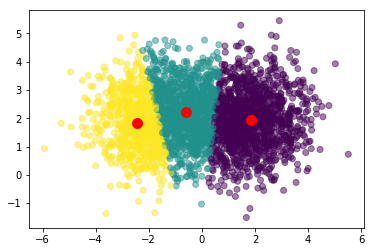

In [28]:
plt.figure()
plt.scatter(X[:,0],X[:,1],alpha=.5, c = kmeans.r.argmax(axis=0))
plt.scatter(kmeans.m[:,0],kmeans.m[:,1], s=100,c="r")

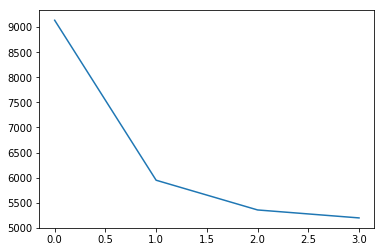

In [29]:
plt.plot(kmeans.J)

In [30]:
donut = donut.astype(float)
type(donut[0,0])

numpy.float64

In [34]:
kmeans = K_means(donut,3,1)
kmeans.fit(4,.01)

kmeans.m[0,:]

array([4.18768242, 4.14349783])

In [35]:
kmeans.m

array([[ 4.18768242,  4.14349783],
       [-0.59529653, -0.71975049],
       [ 1.29328279,  2.62662813]])

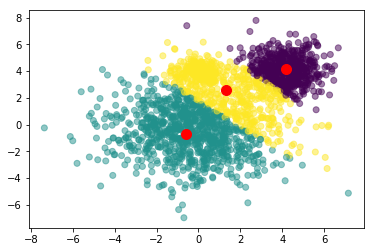

In [36]:
plt.figure()
plt.scatter(donut[:,0],donut[:,1],alpha=.5, c = kmeans.r.argmax(axis=0))
plt.scatter(kmeans.m[:,0],kmeans.m[:,1], s=100,c="r")
#Yuck 

In [ ]:
kmeans = K_means(donut,2,1)
kmeans.fit(4,.01)

kmeans.m[0,:]

In [4]:
mix = pd.read_csv("/home/techfield/Downloads/gmm.csv",sep = " ", header = None) 
mix
#mix = donut.drop(donut.columns[2], axis=1)
mix = mix.as_matrix()

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [23]:
#mix = mix.astype(float)
type(mix)
type(mix[0,0])

str

In [8]:
kmeans = K_means(mix,3,1)
kmeans.fit(4,.01)

kmeans.m[0,:]

TypeError: unsupported operand type(s) for -: 'str' and 'str'